In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,BatchNormalization,Activation
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.utils import np_utils
from keras.datasets import cifar10
import PIL
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow import keras

In [ ]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

170508288/170498071 [==============================] - 11s 0us/step


In [ ]:
print('Size of train data {} '.format(X_train.shape))
print('Size of test data {} '.format(X_test.shape))

Size of train data (50000, 32, 32, 3) 
Size of test data (10000, 32, 32, 3) 


In [ ]:
print('Size of train class {} '.format(y_train.shape))
print('Size of test class {} '.format(y_test.shape))


Size of train class (50000, 1) 
Size of test class (10000, 1) 


In [ ]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
num_classes = len(np.unique(y_train))

print('Total class {}'.format(num_classes))

Total class 10


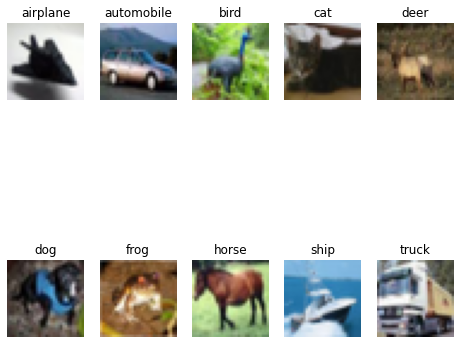

In [ ]:
plt.figure(figsize = (8,8))
for i in range(num_classes):
  ax= plt.subplot(2,5,i+1)
  idx= np.where(y_train[:]== i)[0]
  features_idx = X_train[idx,::]
  plt.imshow(features_idx[0])
  ax.set_title(class_names[i])
  plt.axis("off")

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train= X_train/255.0
X_test= X_test/255.0

In [ ]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [ ]:
model = Sequential([
                    layers.Conv2D(32,(3,3),input_shape=X_train.shape[1:],padding="same",activation="relu"),
                    layers.MaxPooling2D(pool_size=(2,2)),
                    layers.Conv2D(64,3,padding="same" , activation="relu"),
                    layers.MaxPooling2D(pool_size =(2,2)),
                    layers.Conv2D(64,3,padding="same",activation="relu"),
                    layers.MaxPooling2D(pool_size=(2,2)),
                    layers.Dropout(0.2),
                    layers.Flatten(),
                    layers.Dense(256,activation="relu"),
                    layers.Dense(num_classes,activation="softmax")
])

In [ ]:
model.compile (optimizer="adam",
              loss="categorical_crossentropy",
              metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

In [ ]:
seed = 21
np.random.seed(seed)
epochs = 10
batch_size = 32
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs,batch_size=batch_size)

Epoch 1/10
1563/1563 [==============================] - 173s 110ms/step - loss: 1.4086 - accuracy: 0.4876 - val_loss: 1.1806 - val_accuracy: 0.5888
Epoch 2/10
1563/1563 [==============================] - 140s 90ms/step - loss: 1.0185 - accuracy: 0.6387 - val_loss: 0.9169 - val_accuracy: 0.6775
Epoch 3/10
1563/1563 [==============================] - 114s 73ms/step - loss: 0.8670 - accuracy: 0.6962 - val_loss: 0.8385 - val_accuracy: 0.7025
Epoch 4/10
1563/1563 [==============================] - 110s 71ms/step - loss: 0.7652 - accuracy: 0.7321 - val_loss: 0.8486 - val_accuracy: 0.7047
Epoch 5/10
1563/1563 [==============================] - 109s 70ms/step - loss: 0.6943 - accuracy: 0.7567 - val_loss: 0.7515 - val_accuracy: 0.7424
Epoch 6/10
1563/1563 [==============================] - 110s 70ms/step - loss: 0.6313 - accuracy: 0.7765 - val_loss: 0.7146 - val_accuracy: 0.7540
Epoch 7/10
1563/1563 [==============================] - 110s 70ms/step - loss: 0.5808 - accuracy: 0.7946 - val_loss: 

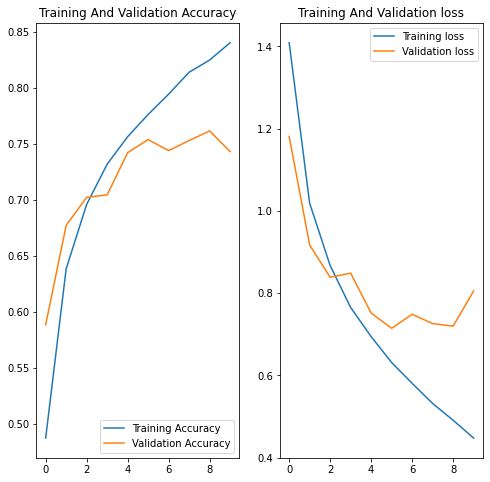

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss =history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label="Training Accuracy")
plt.plot(epochs_range,val_acc,label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title('Training And Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label="Training loss")
plt.plot(epochs_range,val_loss,label="Validation loss")
plt.legend(loc="upper right")
plt.title('Training And Validation loss')
plt.show()

this image most likely belongs to horse with a 23.20 percent confidence .
Image after resizing to 32X32
this image most likely belongs to automobile with a 23.20 percent confidence .
Image after resizing to 32X32
this image most likely belongs to truck with a 23.20 percent confidence .
Image after resizing to 32X32
this image most likely belongs to airplane with a 23.20 percent confidence .
Image after resizing to 32X32
this image most likely belongs to ship with a 23.20 percent confidence .
Image after resizing to 32X32


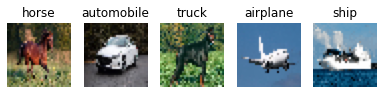

In [ ]:
url_dict = {
    
}

url_dict.clear()

url_dict = {
    'Horse' : 'https://www.cavalluna.com/fileadmin/og-images/Pferderassen/og-image-american-quarter-horse-1200x630.png' ,
    'Car' : 'https://www.cnet.com/a/img/CSTqzAl5wJ57HHyASLD-a0vS2O0=/940x528/2021/04/05/9e065d90-51f2-46c5-bd3a-416fd4983c1a/elantra-1080p.jpg' , 
    'Dog' : 'https://static.dw.com/image/19177976_303.jpg' , 
    'Plane' : 'https://e3.365dm.com/21/07/1600x900/skynews-boeing-737-plane_5435020.jpg?20210702173340' , 
    'Ship' : 'https://www.marineinsight.com/wp-content/uploads/2019/08/Cruise-ships-1.png'
}
i = 0 
plt.figure(figsize=(8,8))
for key,value in url_dict.items():
  url =  value
  i+=1
  path =  tf.keras.utils.get_file(key,origin=url)
  img =  keras.preprocessing.image.load_img(path , target_size = (32,32))
  img_array =  keras.preprocessing.image.img_to_array(img)
  img_array =  tf.expand_dims(img_array,0)
  predictions =  model.predict(img_array)
  score = tf.nn.softmax(predictions[0])
  print("this image most likely belongs to {} with a {:.2f} percent confidence .".format(class_names[np.argmax(score)],100*np.max(score)))
  print("Image after resizing to 32X32")
  ax= plt.subplot(1,6,i+1)
  plt.imshow(img)
  ax.set_title(class_names[np.argmax(score)])
  plt.axis("off")